# EDA

In [158]:
library(tidyverse)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Target Columns

In [45]:
target <- feather::read_feather('raw_data/train_nextDayPlayerEngagement.feather')

In [178]:
head(target)
dim(target)

engagementMetricsDate,playerId,target1,target2,target3,target4,main_date
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2018-01-02,628317,0.011167071,4.4747082,0.005167730,5.7352941,2018-01-01
2018-01-02,547989,0.042993222,5.5933852,0.045033073,2.7941176,2018-01-01
2018-01-02,519317,0.974326905,56.1770428,13.693745571,64.1666667,2018-01-01
2018-01-02,607625,0.006700242,2.6750973,0.005167730,1.8627451,2018-01-01
2018-01-02,592547,0.001116707,0.6322957,0.002952988,0.9313725,2018-01-01
2018-01-02,641553,0.011725424,3.8424125,1.001801323,0.6862745,2018-01-01


[1] 2506176       7

how much are target columns correlated?


In [86]:
target_cols <- c('target1','target2','target3', 'target4')
target_corrs <- data.frame()

for(col1 in target_cols) {
    for(col2 in target_cols){
        key <- paste0(min(as.numeric(str_extract(col1,'\\d')),as.numeric(str_extract(col2,'\\d'))),
                          max(as.numeric(str_extract(col1,'\\d')),as.numeric(str_extract(col2,'\\d'))))
        if(col1 != col2 & !key %in% target_corrs$key){
            corr <- data.frame(col1=col1, col2=col2, key, cor = cor(target[[col1]], target[[col2]]))
            target_corrs <- rbind(target_corrs, corr)
        }
        
    }
}

In [88]:
target_corrs %>%
select(-key)

col1,col2,cor
<fct>,<fct>,<dbl>
target1,target2,0.4045321
target1,target3,0.4110238
target1,target4,0.3849621
target2,target3,0.3881341
target2,target4,0.5489905
target3,target4,0.3703335


How does engagement drop off?
* target 1 seems fairly stable and peaks more towards the end of the period
* target 2 has a clear drop off in engagement over time
* target 3 similar to target 1 but higher variance and no peak towards the end
* target 4 shows rapid drop off in first few days and recovers in mid and end of series

`summarise()` has grouped output by 'engagementMetricsDate'. You can override using the `.groups` argument.



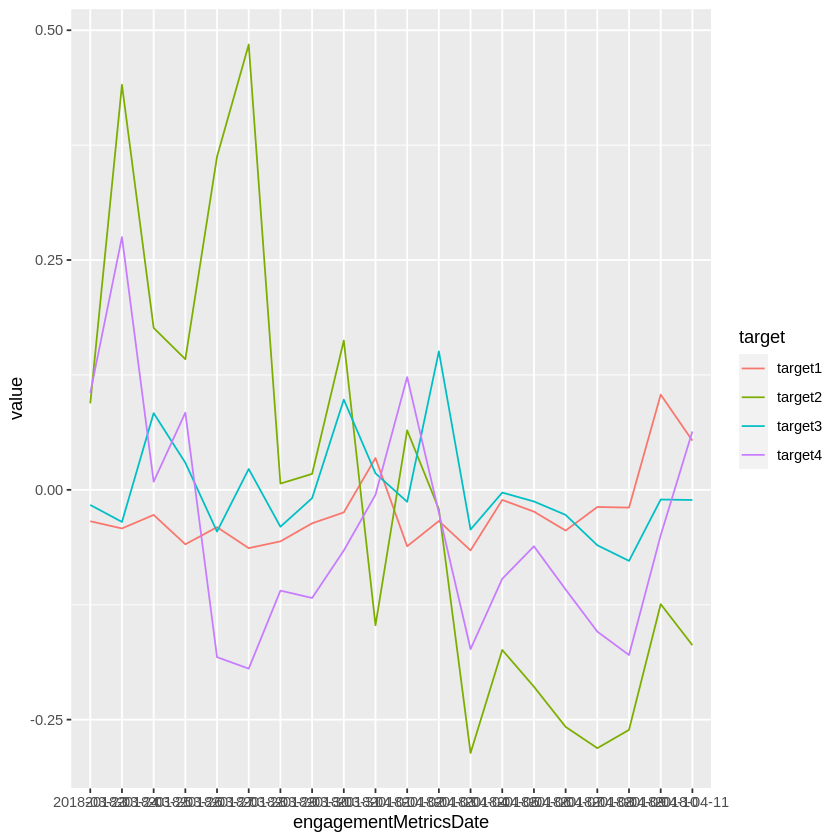

In [165]:
target %>%
mutate(across(starts_with('target'), scale)) %>%
group_by(engagementMetricsDate,main_date) %>%
summarise(across(starts_with('target'),mean)) %>%
filter(main_date == as.Date('2018-03-22','%Y-%m-%d')) %>%
pivot_longer(target1:target4, names_to='target', values_to='value') %>%
ggplot() +
geom_line(aes(x = engagementMetricsDate, y = value, col=target, group=target))

### Awards.csv

In [ ]:
awards <- read_csv('raw_data/Awards.csv')

In [4]:
glimpse(awards)

Rows: 11,256
Columns: 7
$ awardDate         <date> 2017-12-21, 2017-12-20, 2017-12-20, 2017-12-20, 201…
$ awardSeason       <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017…
$ awardId           <chr> "WARRENSPAHN", "MILBORGAS", "MILBORGAS", "MILBORGAS"…
$ awardName         <chr> "Warren Spahn Award", "MiLB.com Organization All-Sta…
$ playerId          <dbl> 477132, 474319, 592530, 593833, 600466, 641914, 6453…
$ playerName        <chr> "Clayton Kershaw", "Brandon Snyder", "Jose Marmolejo…
$ awardPlayerTeamId <dbl> 119, 120, 120, 120, 120, 120, 120, 120, 120, 671, 67…




455 different awards, some given more frequently than others

In [10]:
awards %>% 
count(awardName) %>%
arrange(desc(n)) %>%
head(20)

awardName,n
<chr>,<int>
MiLB.com Organization All-Star,1307
Futures Game Selection,425
AFL Rising Stars,316
NL All-Star,277
AL All-Star,270
FSL Mid-Season All-Star,235
NL Player of the Week,230
SOU Mid-Season All-Star,223
MID Mid-Season All-Star,222


small number of players have a large amount of awards

In [11]:
awards %>% 
count(playerId, playerName) %>%
arrange(desc(n)) %>%
head(20)

playerId,playerName,n
<dbl>,<chr>,<int>
405395,Albert Pujols,70
545361,Mike Trout,64
408234,Miguel Cabrera,58
477132,Clayton Kershaw,47
514888,Jose Altuve,44
400085,Ichiro Suzuki,43
429664,Robinson Cano,43
502671,Paul Goldschmidt,43
457705,Andrew McCutchen,42


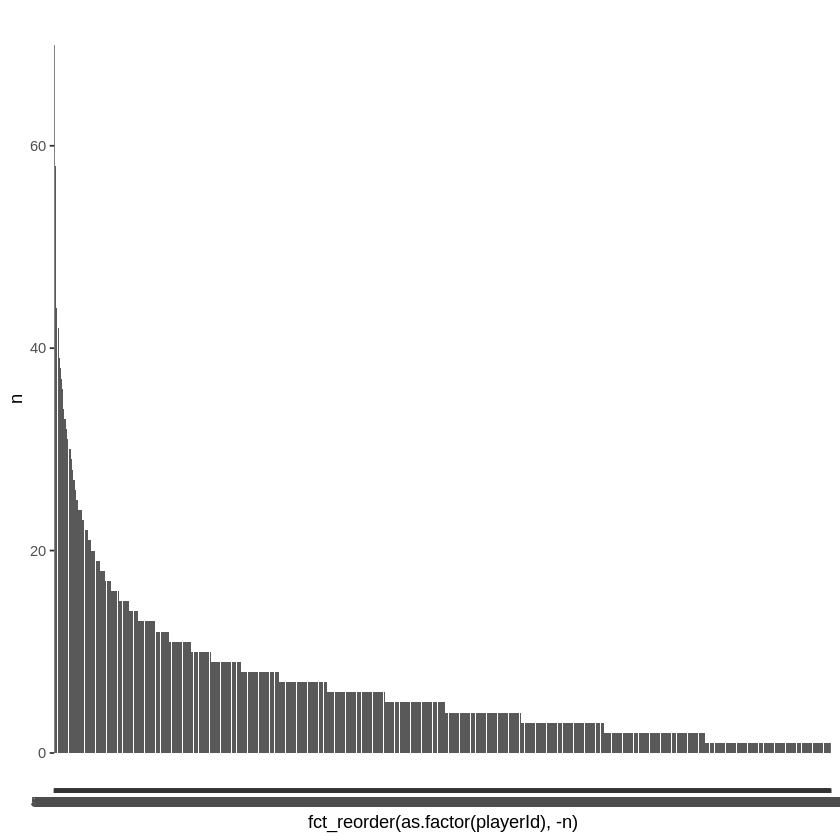

In [24]:
awards %>% 
count(playerId, playerName) %>%
ggplot()+
geom_bar(aes(x=fct_reorder(as.factor(playerId),-n), y=n), stat='identity')

In [15]:
awards %>% 
count(playerId, playerName) %>%
arrange(desc(n)) %>%
head(20)

playerId,playerName,n
<dbl>,<chr>,<int>
405395,Albert Pujols,70
545361,Mike Trout,64
408234,Miguel Cabrera,58
477132,Clayton Kershaw,47
514888,Jose Altuve,44
400085,Ichiro Suzuki,43
429664,Robinson Cano,43
502671,Paul Goldschmidt,43
457705,Andrew McCutchen,42


#### Possible features:

* Total awards
* Season awards
* Time since last award received
* Time until next award possibility
* Time since last award possibility
* Team awards

#### Possible relationship with target

* More awards likely correlated with social media followers
* Recent awards likely to spark discussion
* possibility of award likely to spark discussion

### players.csv

In [35]:
players <- read_csv('raw_data/players.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  playerId = col_double(),
  playerName = col_character(),
  DOB = col_date(format = ""),
  mlbDebutDate = col_date(format = ""),
  birthCity = col_character(),
  birthStateProvince = col_character(),
  birthCountry = col_character(),
  heightInches = col_double(),
  weight = col_double(),
  primaryPositionCode = col_character(),
  primaryPositionName = col_character(),
  playerForTestSetAndFuturePreds = col_logical()
)




In [47]:
head(players)

playerId,playerName,DOB,mlbDebutDate,birthCity,birthStateProvince,birthCountry,heightInches,weight,primaryPositionCode,primaryPositionName,playerForTestSetAndFuturePreds
<dbl>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
665482,Gilberto Celestino,1999-02-13,2021-06-02,Santo Domingo,NA,Dominican Republic,72,170,8,Outfielder,FALSE
593590,Webster Rivas,1990-08-08,2021-05-28,Nagua,NA,Dominican Republic,73,219,3,First Base,TRUE
661269,Vladimir Gutierrez,1995-09-18,2021-05-28,Havana,NA,Cuba,73,190,1,Pitcher,TRUE
669212,Eli Morgan,1996-05-13,2021-05-28,Rancho Palos Verdes,CA,USA,70,190,1,Pitcher,TRUE
666201,Alek Manoah,1998-01-09,2021-05-27,Homestead,FL,USA,78,260,1,Pitcher,TRUE
680911,Owen Miller,1996-11-15,2021-05-23,Mequon,WI,USA,72,185,4,Second Base,TRUE


In [49]:
players_target <- target %>%
left_join(players, by = c('playerId'='playerId'))

In [104]:
player_sum_target <- players_target %>%
group_by(playerName) %>% 
summarise(across(starts_with('target'), sum)) 

top players by sum of target variable:

In [105]:
player_sum_target %>%
mutate(across(starts_with('target'), ~dense_rank(desc(.x)),`.names` = '{col}_rank')) %>%
arrange(target1_rank) %>%
head()

playerName,target1,target2,target3,target4,target1_rank,target2_rank,target3_rank,target4_rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Aaron Judge,18121.49,27994.79,18007.01,24895.101,1,5,2,7
Mookie Betts,15475.09,28719.31,16487.89,25620.939,2,4,3,6
Mike Trout,15210.13,43045.83,14937.05,39082.305,3,1,5,1
Ronald Acuna Jr.,13355.40,22765.22,12500.43,7368.678,4,14,9,69
Giancarlo Stanton,13281.97,24876.12,13929.64,19898.316,5,9,6,10
Javier Baez,13052.59,16774.80,11344.64,7341.937,6,26,11,70


Designated hitter had highest average target, infield lowest

In [107]:
position_avg_target <- players_target %>%
group_by(primaryPositionName) %>% 
summarise(across(starts_with('target'), mean)) 

In [108]:
position_avg_target %>%
mutate(across(starts_with('target'), ~dense_rank(desc(.x)),`.names` = '{col}_rank')) %>%
arrange(target1_rank)

primaryPositionName,target1,target2,target3,target4,target1_rank,target2_rank,target3_rank,target4_rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Designated Hitter,3.02740129,7.5376834,3.298173981,4.8512828,1,1,1,1
First Base,1.33810167,4.3755343,1.217360162,2.2326609,2,2,2,2
Outfielder,1.15639489,3.6884507,1.139378689,1.8898057,3,3,3,3
Shortstop,1.08642867,3.1043986,0.994011839,1.3909240,4,5,5,5
Third Base,1.00352114,3.3777298,1.048349628,1.7461691,5,4,4,4
Second Base,0.78023684,2.9015945,0.757066702,1.3175468,6,6,6,6
Catcher,0.49961088,1.9007636,0.525061283,0.9386558,7,7,7,8
Outfield,0.44009041,1.7307936,0.446088560,0.9416388,8,9,9,7
Pitcher,0.26152218,1.8891006,0.487233737,0.7853418,9,8,8,9


Quebec had highest target

In [109]:
state_avg_target <- players_target %>%
group_by(birthStateProvince) %>% 
summarise(across(starts_with('target'), mean)) 

In [111]:
state_avg_target %>%
mutate(across(starts_with('target'), ~dense_rank(desc(.x)),`.names` = '{col}_rank')) %>%
arrange(target1_rank) %>%
head

birthStateProvince,target1,target2,target3,target4,target1_rank,target2_rank,target3_rank,target4_rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
QC,2.819892,7.889064,2.620009,5.135369,1,1,1,1
WY,1.869066,6.100271,1.439937,1.801384,2,2,6,8
NM,1.459821,3.741029,1.762018,2.228222,3,5,2,4
DE,1.373123,3.590251,1.121289,1.340551,4,6,8,15
NV,1.239449,4.163806,1.695965,2.494497,5,4,3,2
BC,1.041945,4.288923,1.462897,1.277792,6,3,4,18


#### Potential feature engineering:
* Age
* Birthday (1/0)
* target encode position
* target encode state

### seasons.csv

In [118]:
seasons <- read_csv('raw_data/seasons.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  seasonId = col_double(),
  seasonStartDate = col_date(format = ""),
  seasonEndDate = col_date(format = ""),
  preSeasonStartDate = col_date(format = ""),
  preSeasonEndDate = col_date(format = ""),
  regularSeasonStartDate = col_date(format = ""),
  regularSeasonEndDate = col_date(format = ""),
  lastDate1stHalf = col_date(format = ""),
  allStarDate = col_date(format = ""),
  firstDate2ndHalf = col_date(format = ""),
  postSeasonStartDate = col_date(format = ""),
  postSeasonEndDate = col_date(format = "")
)




In [128]:
seasons

seasonId,seasonStartDate,seasonEndDate,preSeasonStartDate,preSeasonEndDate,regularSeasonStartDate,regularSeasonEndDate,lastDate1stHalf,allStarDate,firstDate2ndHalf,postSeasonStartDate,postSeasonEndDate
<dbl>,<date>,<date>,<date>,<date>,<date>,<date>,<date>,<date>,<date>,<date>,<date>
2017,2017-04-02,2017-11-01,2017-02-22,2017-04-01,2017-04-02,2017-10-01,2017-07-09,2017-07-11,2017-07-14,2017-10-03,2017-11-01
2018,2018-03-29,2018-10-28,2018-02-21,2018-03-27,2018-03-29,2018-10-01,2018-07-15,2018-07-17,2018-07-19,2018-10-02,2018-10-28
2019,2019-03-20,2019-10-30,2019-02-21,2019-03-26,2019-03-20,2019-09-29,2019-07-07,2019-07-09,2019-07-11,2019-10-01,2019-10-30
2020,2020-07-23,2020-10-28,2020-02-21,2020-07-22,2020-07-23,2020-09-27,2020-08-25,NA,2020-08-26,2020-09-29,2020-10-28
2021,2021-02-28,2021-10-31,2021-02-28,2021-03-30,2021-04-01,2021-10-03,2021-07-11,2021-07-13,2021-07-15,2021-10-04,2021-10-31


### Teams.csv

In [123]:
teams <- read_csv('raw_data/teams.csv')
head(teams)


── Column specification ────────────────────────────────────────────────────────
cols(
  id = col_double(),
  name = col_character(),
  teamName = col_character(),
  teamCode = col_character(),
  shortName = col_character(),
  abbreviation = col_character(),
  locationName = col_character(),
  leagueId = col_double(),
  leagueName = col_character(),
  divisionId = col_double(),
  divisionName = col_character(),
  venueId = col_double(),
  venueName = col_character()
)




id,name,teamName,teamCode,shortName,abbreviation,locationName,leagueId,leagueName,divisionId,divisionName,venueId,venueName
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
108,Los Angeles Angels,Angels,ana,LA Angels,LAA,Anaheim,103,American League,200,American League West,1,Angel Stadium
109,Arizona Diamondbacks,D-backs,ari,Arizona,ARI,Phoenix,104,National League,203,National League West,15,Chase Field
110,Baltimore Orioles,Orioles,bal,Baltimore,BAL,Baltimore,103,American League,201,American League East,2,Oriole Park at Camden Yards
111,Boston Red Sox,Red Sox,bos,Boston,BOS,Boston,103,American League,201,American League East,3,Fenway Park
112,Chicago Cubs,Cubs,chn,Chi Cubs,CHC,Chicago,104,National League,205,National League Central,17,Wrigley Field
113,Cincinnati Reds,Reds,cin,Cincinnati,CIN,Cincinnati,104,National League,205,National League Central,2602,Great American Ball Park


In [126]:
count(teams, leagueName, divisionName)

leagueName,divisionName,n
<chr>,<chr>,<int>
American League,American League Central,5
American League,American League East,5
American League,American League West,5
National League,National League Central,5
National League,National League East,5
National League,National League West,5


### train_events.feather

In [129]:
train_events <- feather::read_feather('raw_data/train_events.feather')

In [131]:
dim(train_events)

[1] 2017654      72

In [133]:
glimpse(train_events)

Rows: 2,017,654
Columns: 72
$ gamePk        <int> 529409, 529416, 529416, 529411, 529406, 529411, 529418, …
$ gameDate      <chr> "2018-03-29", "2018-03-29", "2018-03-29", "2018-03-29", …
$ gameTimeUTC   <chr> "2018-03-30T02:10:00Z", "2018-03-29T20:10:00Z", "2018-03…
$ season        <int> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 20…
$ gameType      <chr> "R", "R", "R", "R", "R", "R", "R", "R", "R", "R", "R", "…
$ playId        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ eventId       <int> 5, 0, 4, 4, 5, 1, 6, 6, 3, 1, 3, 4, 3, 3, 6, 1, 5, 2, 2,…
$ inning        <int> 9, 3, 9, 3, 8, 9, 6, 8, 11, 1, 7, 7, 9, 8, 9, 8, 5, 9, 2…
$ halfInning    <chr> "top", "bottom", "top", "bottom", "top", "bottom", "bott…
$ homeScore     <int> 2, 0, 5, 0, 0, 0, 0, 8, 2, 0, 0, 6, 5, 8, 5, 3, 4, 2, 0,…
$ awayScore     <int> 1, 1, 5, 2, 4, 4, 1, 4, 2, 0, 0, 2, 14, 4, 14, 5, 6, 0, …
$ menOnBase     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ atBatIndex

Types of events (64) captured:


In [137]:
train_events %>%
count(event) %>%
arrange(desc(n)) %>%
head(20)

event,n
<chr>,<int>
NA,1396121
Strikeout,108439
Groundout,82192
Single,66266
Game Advisory,52914
Flyout,51668
Pitching Substitution,42653
Walk,39017
Lineout,28662


each event contains a description - could use some sort of word2vec encoding to get meaning out

In [138]:
train_events$description[1:5]

[1] "With Lonnie Chisenhall batting, Rajai Davis advances to 2nd on a balk."                                    
[2] "Atlanta Braves catcher Tyler Flowers left the game due to an injured side."                                
[3] "Atlanta Braves Manager Brian Snitker ejected by 3B umpire Jordan Baker."                                   
[4] "With Delino DeShields batting, Justin Verlander picks off Rougned Odor at 1st on throw to Marwin Gonzalez."
[5] "Mookie Betts out at 1st, catcher Wilson Ramos to first baseman C.  J.   Cron."

Top events by target (for pitcher):

In [187]:
events_target <- train_events %>%
head(100000) %>%
left_join(target, by = c('main_date'='main_date', 'pitcherId'='playerId'))

In [191]:
events_target %>%
select(event, starts_with('target')) %>%
group_by(event) %>%
summarise(across(starts_with('target'),mean)) %>%
arrange(desc(target1)) %>%
head(10)

event,target1,target2,target3,target4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Triple Play,2.990520,8.853665,6.350272,1.826451
Bunt Lineout,1.722194,6.852556,3.592346,1.205270
Stolen Base Home,1.471216,9.590855,4.288144,4.246929
Batter Interference,1.387968,8.393238,3.114422,4.718742
Bunt Pop Out,1.356937,7.224076,1.203311,2.110315
Caught Stealing 3B,1.321676,7.397475,1.259830,1.505327
Pickoff Error 1B,1.158135,7.751862,2.292012,2.239782
Bunt Groundout,1.130272,6.004764,1.611421,1.886731
Passed Ball,1.124916,5.723984,1.622438,2.369886


Top events by target (for hitter):

In [192]:
events_target_hitter <- train_events %>%
head(100000) %>%
left_join(target, by = c('main_date'='main_date', 'hitterId'='playerId'))

In [194]:
events_target_hitter %>%
select(event, starts_with('target')) %>%
group_by(event) %>%
summarise(across(starts_with('target'),mean)) %>%
arrange(desc(target1)) %>%
head(10)

event,target1,target2,target3,target4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Umpire Substitution,8.941602,23.846102,8.577969,15.647441
Runner Out,6.202236,9.459521,5.043806,3.759489
Caught Stealing Home,6.096377,15.332055,8.537438,11.977802
Error,5.151956,6.358901,3.528312,2.525976
Other Advance,4.449776,5.912963,8.269347,3.914747
Double Play,4.169585,9.687868,4.577680,4.751247
Intent Walk,3.608281,8.446276,3.486095,4.362385
Sac Fly,3.334331,8.161758,3.317905,4.667866
Injury,3.264186,7.650722,3.648134,3.422744


#### Potential features to engineer:

* \# of strikeout events for a player in a given game
* \# of ... events
* measure of event sentiment from description
* target encode events

In [186]:
dim(train_events)

[1] 2017654      72